# Using a distributional space

Context-based representations of word meaning are also known as distributional models (because they reflect the distribution of a target word, that is, the contexts in which it appears), as semantic spaces or vector spaces, and as word embeddings. They represent a target word as a vector, which is the same as a set of coordinates, a sequence of numbers, that reflect the contexts in which the word has been seen. In the simplest case, this sequence of numbers shows the co-occurrence counts of the target word with each of a sequence of chosen context words. The most important point about a semantic space is that it locates words in such a way that words with similar meanings will be close together in space (where "close together" typically means having a high cosine similarity).

In this notebook, we demonstrate what you can do with a semantic space. For simplicity, we start with a pre-computed semantic space. 

# Pre-computed semantic spaces in gensim

The Python package *gensim* comes with several pre-computed distributonal spaces, as well as methods for working with these spaces. Here is how to access them:

In [1]:
import gensim.downloader as gensim_api

# what corpora and pre-trained models does gensim have?
# if we get the whole info, it's not easy to read
gensim_info = gensim_api.info()

# uncomment this to get a deluge of text
# print(gensim_info)

In [2]:
# What info() returns is in fact a dictionary with two entries: 
# corpora, and models
print("Two types of information in the gensim downloader:")
for infotype in gensim_info.keys():
    print("\t", infotype)


Two types of information in the gensim downloader:
	 corpora
	 models


In [3]:
# Let's look in 'models'. This is, again, a dictionary, where the
# keys are model labels
print("Gensim has the following models")
for modelname in gensim_info["models"].keys():
    print(modelname)


Gensim has the following models
fasttext-wiki-news-subwords-300
conceptnet-numberbatch-17-06-300
word2vec-ruscorpora-300
word2vec-google-news-300
glove-wiki-gigaword-50
glove-wiki-gigaword-100
glove-wiki-gigaword-200
glove-wiki-gigaword-300
glove-twitter-25
glove-twitter-50
glove-twitter-100
glove-twitter-200
__testing_word2vec-matrix-synopsis


In [4]:
# The entry for each model is, again, a dictionary.
# Let's look at one
print("Info for glove-wiki-gigaword-300:")
for entry, value in gensim_info["models"]["glove-wiki-gigaword-300"].items():
    print(entry, ":", value)


Info for glove-wiki-gigaword-300:
num_records : 400000
file_size : 394362229
base_dataset : Wikipedia 2014 + Gigaword 5 (6B tokens, uncased)
reader_code : https://github.com/RaRe-Technologies/gensim-data/releases/download/glove-wiki-gigaword-300/__init__.py
license : http://opendatacommons.org/licenses/pddl/
parameters : {'dimension': 300}
description : Pre-trained vectors based on Wikipedia 2014 + Gigaword, 5.6B tokens, 400K vocab, uncased (https://nlp.stanford.edu/projects/glove/).
preprocessing : Converted to w2v format with `python -m gensim.scripts.glove2word2vec -i <fname> -o glove-wiki-gigaword-300.txt`.
read_more : ['https://nlp.stanford.edu/projects/glove/', 'https://nlp.stanford.edu/pubs/glove.pdf']
checksum : 29e9329ac2241937d55b852e8284e89b
file_name : glove-wiki-gigaword-300.gz
parts : 1


In [5]:
# The gensim datasets differ in their sizes.
# This is relevant when you want to choose one for download,
# as the large ones may be too big to use. 
# Here are the sizes:
print("Sizes of all models available with gensim:")

for modelname in gensim_info["models"].keys():
    if "file_size" in gensim_info["models"][modelname]:
        print(modelname, "\tsize: ", end= "")
        print(int(gensim_info["models"][modelname]["file_size"])/1000000, "M")


Sizes of all models available with gensim:
fasttext-wiki-news-subwords-300 	size: 1005.007116 M
conceptnet-numberbatch-17-06-300 	size: 1225.497562 M
word2vec-ruscorpora-300 	size: 208.427381 M
word2vec-google-news-300 	size: 1743.56384 M
glove-wiki-gigaword-50 	size: 69.182535 M
glove-wiki-gigaword-100 	size: 134.300434 M
glove-wiki-gigaword-200 	size: 264.336934 M
glove-wiki-gigaword-300 	size: 394.362229 M
glove-twitter-25 	size: 109.885004 M
glove-twitter-50 	size: 209.216938 M
glove-twitter-100 	size: 405.932991 M
glove-twitter-200 	size: 795.3731 M


In [6]:
###
# We now load one space. 
# Spaces differ in size, but also in the data on which they were trained.
# 
# I've chosen a mid-size one to get reasonable performance
# with not too gigantic a download,
# and I've chosen one trained on Wikipedia, which should give
# you a nice variety of contexts, along with gigaword,
# which is all news.
# 
# Feel free to choose a different space
# if this one is too slow to load on your machine --
# but note that your results will be slightly different
# than the ones I demonstrate. 
space = gensim_api.load("glove-wiki-gigaword-300")

### Using gensim's functions for exploring the space

We can now inspect the embedding / the vector / the coordinates that this space has for a target word, like this:

In [7]:
# you can get direct access to the vector associated with each word
# using straight brackets, as if the space was a dictionary:
space["amiable"]


array([-2.2541e-01,  3.9245e-02, -5.0450e-02, -1.8675e-01,  1.1354e-01,
        6.5802e-02,  3.9057e-02, -3.4870e-01,  1.6906e-01,  1.1843e-01,
       -9.0627e-02,  1.4391e-01, -4.4182e-01, -5.3203e-01, -3.7712e-01,
        2.2891e-01, -9.4016e-02,  4.5197e-03, -8.2949e-02,  1.4225e-01,
       -3.9489e-02,  5.9168e-01,  1.0723e-01,  4.9680e-01, -1.8976e-01,
       -1.8070e-01,  1.8460e-01, -2.7845e-01,  2.0893e-01, -3.4110e-02,
       -3.5694e-01, -1.0430e-01, -1.4370e-01,  3.9369e-02,  2.6469e-01,
        5.1050e-01,  2.2678e-01, -2.5711e-01, -3.8650e-01,  4.0672e-02,
        1.3131e-01,  5.0217e-02, -9.5307e-02, -1.5870e-01, -3.0679e-01,
        3.2927e-01,  3.1820e-01, -1.0922e-01, -1.3237e-02, -3.2883e-02,
        1.6459e-01, -2.3211e-01,  6.7338e-02,  2.5605e-01,  4.7802e-01,
        2.7384e-01, -2.7832e-02, -1.9969e-01,  4.3772e-01, -2.5280e-01,
        5.4337e-01, -2.0514e-01,  4.3163e-01, -2.1510e-01, -1.4490e-01,
        5.5399e-02,  3.0595e-01,  1.7990e-01,  2.4180e-01,  7.96

What does this mean? We cannot tell from the numbers. To get a sense of what the word vector means, we have to look at its similarity to other word vectors. 

In [8]:
# what kind of thing is this object we call space?

type(space)

gensim.models.keyedvectors.KeyedVectors

# Cosine similarity

Gensim comes with a function that computes cosine similarity (higher = more similar) between word vectors:

In [8]:
# computing cosine similarity
print("amiable vs grouchy", space.similarity("amiable", "grouchy"))
print("amiable vs affable", space.similarity("amiable", "affable"))
print("amiable vs obliging", space.similarity("amiable", "obliging"))

amiable vs grouchy 0.36090654
amiable vs affable 0.812942
amiable vs obliging 0.26450017


Let's also implement cosine by hand. We're making it very verbose.

In [10]:
import math

def ourcosine(word1, word2, vec1, vec2):
    
    # vector lengths for the denominator
    veclen1 = math.sqrt(sum([v*v for v in vec1]))
    veclen2= math.sqrt(sum([v * v for v in vec2]))
    
    print("vector for", word1, "length", veclen1)
    print("vector for", word2, "length", veclen2)
    
    # dot product for the numerator
    dotproduct = sum([val1 * val2 for val1, val2 in zip(vec1,  vec2)])
    print("dot product of", word1, "and", word2, "is", dotproduct)
    
    # putting things together
    cosine_value = dotproduct / (veclen1 * veclen2)
    
    print("cosine of", word1, "and", word2, "is", cosine_value)
    
    return cosine_value

In [11]:
ourcosine("amiable", "grouchy", space["amiable"], space["grouchy"])

vector for amiable length 4.935343171426409
vector for grouchy length 5.783099366088851
dot product of amiable and grouchy is 10.300842627264501
cosine of amiable and grouchy is 0.36090653143577567


0.36090653143577567

In [12]:
ourcosine("amiable", "affable", space["amiable"], space["affable"])

vector for amiable length 4.935343171426409
vector for affable length 5.431862590941834
dot product of amiable and affable is 21.793435385945486
cosine of amiable and affable is 0.8129420045405295


0.8129420045405295

In [13]:
ourcosine("amiable", "obliging", space["amiable"], space["obliging"])

vector for amiable length 4.935343171426409
vector for obliging length 4.711085778283201
dot product of amiable and obliging is 6.149846978485584
cosine of amiable and obliging is 0.2645001616780127


0.2645001616780127

# Nearest neighbors

A standard way to get a sense for what a word vector says is to look at the *nearest neighbors* of the word. The nearest neighbors of a target word are the other words in our inventory that have the highest cosine to the target. This characterizes the meaning of the word through its neighborhood in the semantic space.

In [9]:
print("neighborhood of 'amiable':")
for word, sim in space.most_similar("amiable"):
    print("\t", word, sim)
    
print("neighborhood of 'grouchy'")
for word, sim in space.most_similar("grouchy", topn = 20):
    print("\t", word, sim)

neighborhood of 'amiable':
	 affable 0.8129420280456543
	 genial 0.7653029561042786
	 easygoing 0.7628498077392578
	 unassuming 0.6801630258560181
	 jovial 0.6614009737968445
	 personable 0.657274067401886
	 likable 0.6463435292243958
	 unpretentious 0.6235607862472534
	 likeable 0.6146904826164246
	 congenial 0.6083606481552124
neighborhood of 'grouchy'
	 grumpy 0.5547721982002258
	 cranky 0.5063527226448059
	 dopey 0.4778646230697632
	 irascible 0.4405902624130249
	 cantankerous 0.4327520430088043
	 surly 0.4287707209587097
	 pompous 0.42816585302352905
	 irritable 0.42395249009132385
	 hunchbacked 0.4206606149673462
	 ornery 0.4193281829357147
	 uptight 0.41491711139678955
	 overprotective 0.41403964161872864
	 gruff 0.4137725234031677
	 smug 0.4087333679199219
	 snobbish 0.4077928364276886
	 voluble 0.4072340726852417
	 taciturn 0.40713146328926086
	 condescending 0.40333572030067444
	 haughty 0.39932018518447876
	 giggly 0.39813709259033203


How do you compute the nearest neighbors of a word, say "amiable"?

* You compute cosine similarity of "amiable" with *all* the words in your inventory
* You sort words by cosine similarity to "amiable"
* You show the top k words

This is a lot of effort because you need to compute cosine similarity of "amiable" with every other word. There are tricks to speed this up, but it's not worth the effort to implement this by hand, so we rely on gensim's `most_similar`.

## Visualization

If meaning is a space, can we look at its map, and see where the different words are located? Yes, and this is actually a very good way of looking at the semantic neighborhood of a word. Semantic spaces usually have many dimensions, 50 or more, which is not straightforwrad to visualize. So the standard way to go is to use *dimensionality reduction* and then visualize the first two resulting dimensions. Here is code that does this. It uses Principal Component Analysis (PCA) to do dimensionality reduction; another option is to use t-sne. (t-sne produces very pretty visualizations, but it can sometimes make them too pretty, producing clusters of points that look clearer than they are in the underlying data.)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

###
# function that visualizes the nearest neighbors of a given word.
# parameters:
# - word: central word whose neighborhood to visualize
# - space: gensim Word2VecKeyedVectors object, like the space object we 
#   made above
# - topn: number, how many nearest neighbors to include, default is 10
def pca_visualize_neighborhood(word, space, topn = 10):
    # determine the topn nearest neighbors of word
    words_and_sims = space.most_similar(word, topn = topn)
    
    # make a list of all the words to visualize:
    # central word plus nearest neighbors
    words = [ word ] + [w for w, s in words_and_sims]
    
    # put all the word vectors into one matrix
    word_vectors = np.array([space[w] for w in words])
    
    # use dimensionality reduction: 
    # Principal Component Analysis, PCA
    # keep the two first dimensions
    twodim = PCA().fit_transform(word_vectors)[:,:2]

    # set up the canvas
    plt.figure(figsize=(6,6))
    # add a scatter plot of the two-D embeddings
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    # add each of the words to the plot, a bit above and to the right
    # of the 2-D dot it goes with
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

    # now show the canvas
    plt.show()
    


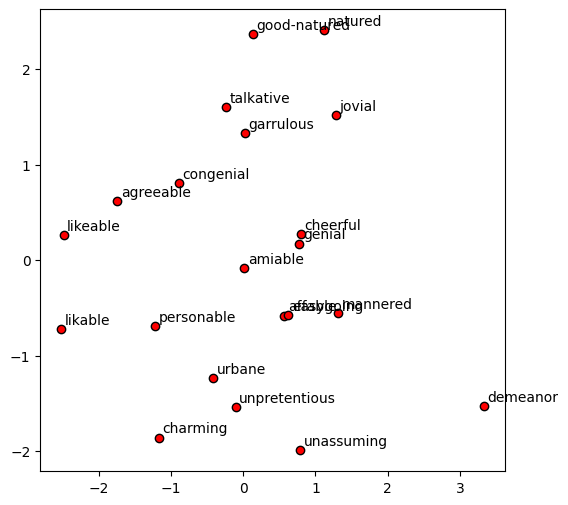

In [16]:
# let's test this visualization
pca_visualize_neighborhood("amiable",space, 20)


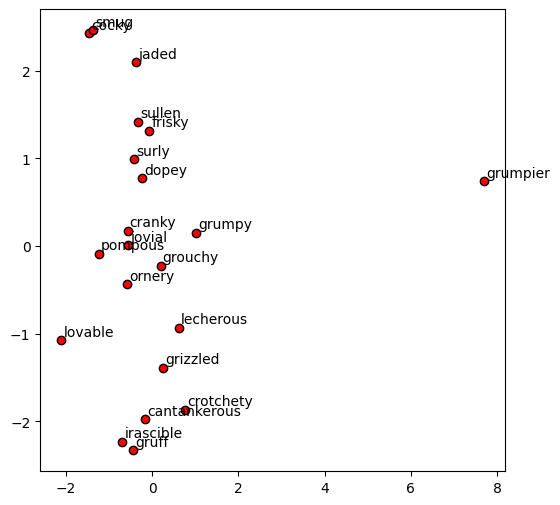

In [17]:
pca_visualize_neighborhood("grumpy", space, 20)

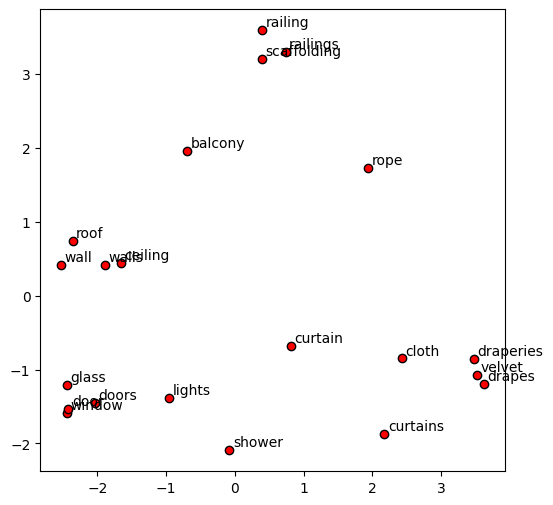

In [18]:
pca_visualize_neighborhood("curtain", space, 20)

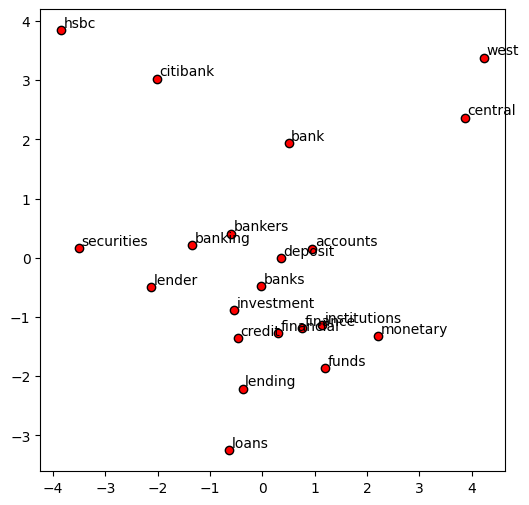

In [19]:
pca_visualize_neighborhood("bank", space, 20)

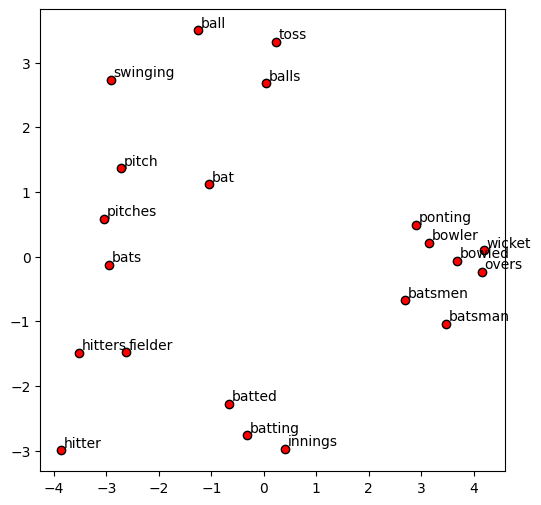

In [20]:
pca_visualize_neighborhood("bat", space, 20)

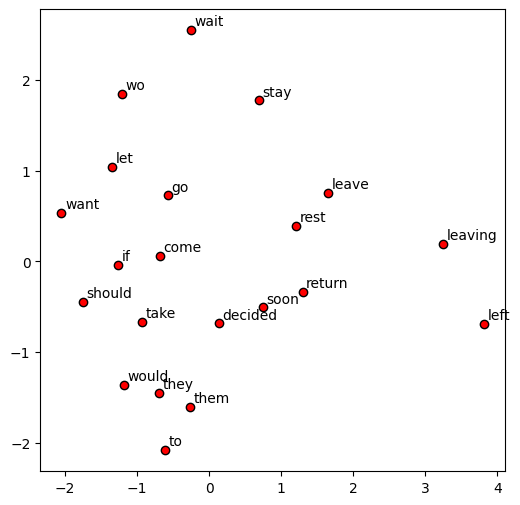

In [21]:
pca_visualize_neighborhood("leave", space, 20)

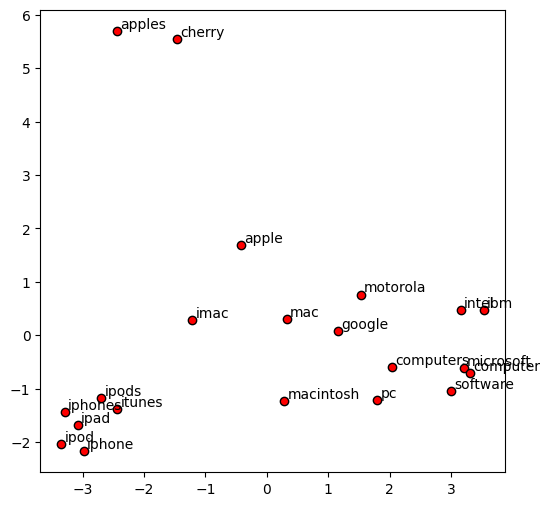

In [22]:
pca_visualize_neighborhood("apple", space, 20)

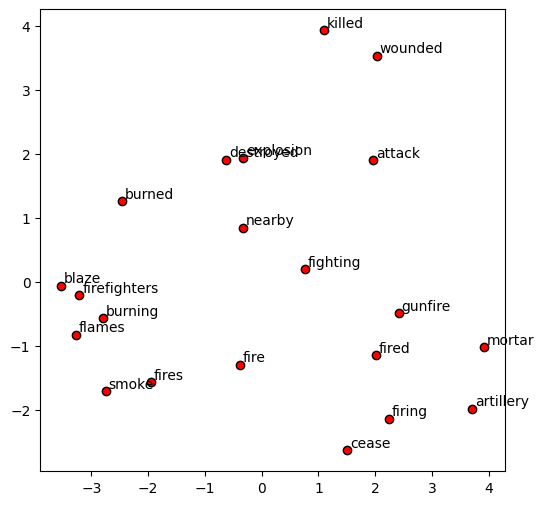

In [23]:
pca_visualize_neighborhood("fire", space, 20)

# Summing up vectors

Summing up two vectors is most easy to understand for count vectors: When we sum up the count vectors for "red" and "apple", the result is again a vector, with the same number of dimensions. In its dimension for the context word "eat", the new vector has the sum of times that "red" has appeared with "eat", and times that "apple" has appeared with "eat". In its "tape" dimension, it has the sum of the co-occurrence counts of "red" with "tape" and "apple" with "tape". Context words that appear a lot with both "red" and "apple" will have high values in the new vector. Context words that are frequent only for one of "red" and "apple" but not both, like "tape" or "computer", will have lower values.

We can think of this vector as the "average context vector" of "red" and "apple". This is most clear if we divide all dimension values by 2, then we have the actual average. But it is also an average vector if we just sum the two: Remember that cosine similarity doesn't care about vector length. For that reason, the sum of multiple vectors is also called their *centroid vector*.

## Phrase vectors

One use of the summing technique is to make a vector for a whole phrase or sentence, by summing the vectors of its words (maybe only its content words). 

To demonstrate, we pull out some words from the Brown corpus that contain the word "fire":

In [24]:
from nltk.corpus import brown

sentences_with_fire = [s for s in brown.sents() if "fire" in s]

# how many sentences did we get?
len(sentences_with_fire)

165

Let's make vectors for the first three sentences. First, here is a function that computes the centroid of vectors:

In [25]:
# Computing the centroid of a
# list of words using a given space
# in which we can look up a word as
# space[word]
def make_centroid(sentence, space):
    # which words in the sentence have a vector?
    # we're also skipping short words, as they are likely to be function words
    words_with_vectors = [w for w in sentence if w in space and len(w) >= 3]
    
    if len(words_with_vectors) == 0:
        # oops, we didn't find any words with vectors
        return None

    # compute the centroid
    return sum([space[w] for w in words_with_vectors])

In [26]:
sent0centroid = make_centroid(sentences_with_fire[0], space)
sent1centroid = make_centroid(sentences_with_fire[1], space)
sent2centroid = make_centroid(sentences_with_fire[2], space)

# what are the three sentences? 
print("sentence 0", " ".join(sentences_with_fire[0]), "\n")
print("sentence 1", " ".join(sentences_with_fire[1]), "\n")
print("sentence 2", " ".join(sentences_with_fire[2]))
      

sentence 0 The jury also commented on the Fulton ordinary's court which has been under fire for its practices in the appointment of appraisers , guardians and administrators and the awarding of fees and compensation . 

sentence 1 Most of the fire was directed by Cotten against Dallas and Sen. Parkhouse . 

sentence 2 -- William J. Seidel , state fire warden in the Department of Conservation and Economic Development , has retired after 36 years of service .


How similar are those sentences? Let's use our own cosine implementation (which works on arbitrary vectors, including centroids) to find out

In [27]:
# Sentence 0 is about (figurative) artillery fire.
# Sentence 1 is, too. 
ourcosine("sent0", "sent1", sent0centroid, sent1centroid)

vector for sent0 length 79.1722612356483
vector for sent1 length 23.933319407492856
dot product of sent0 and sent1 is 1531.4171125802677
cosine of sent0 and sent1 is 0.808197513452542


0.808197513452542

In [28]:
# Sentence 0 is about (figurative) artillery fire.
# Sentence 2 is about firemen.
# so these two should be less similar, but they aren't. oh well.
ourcosine("sent0", "sent2", sent0centroid, sent2centroid)

vector for sent0 length 79.1722612356483
vector for sent2 length 36.617044246315885
dot product of sent0 and sent2 is 2440.552349665435
cosine of sent0 and sent2 is 0.8418443352220379


0.8418443352220379

In [29]:
# Sentence 1 is about (figurative) artillery fire.
# Sentence 2 is about firemen
ourcosine("sent1", "sent2", sent1centroid, sent2centroid)

vector for sent1 length 23.933319407492856
vector for sent2 length 36.617044246315885
dot product of sent1 and sent2 is 719.7295135042514
cosine of sent1 and sent2 is 0.8212645753436081


0.8212645753436081

# Clustering

Clustering means automatically grouping. We can do that to sentence vectors, and automatically group, say, the centroid vectors for sentences involving "fire". Will we get groups that are anything like the word senses of "fire"?

We first compute centroids for all the sentences. We make the centroids have length 1 because the clustering method we use below uses Euclidean distance (walking distance) and is hence susceptible to frequency effects. 

We make the target word variable, so that we can apply the code to different targets:

In [30]:
targetword = "bass"

target_sentences = [s for s in brown.sents() if targetword in s]

# how many sentences did we get?
len(target_sentences)

16

In [31]:
# store a list of centroid vectors
centroids = [ ]
# store list of sentences again --
# in case we have to skip some sentences
# that don't get vectors
sentences_to_use = [ ]

for s in target_sentences:
    centroid = make_centroid(s, space) 
    if centroid is None:
        # we didn't find vectors
        # for any of the words in the sentence 
        print("Sentence without vectors, skipping:", " ".join(s))
        continue
        
    centroid= centroid / math.sqrt(sum(centroid**2))
    centroids.append(centroid)
    sentences_to_use.append(s)

Now we cluster the sentences. We use k-means clustering.

In [32]:
from sklearn.cluster import KMeans

# we have to specify how many clusters we want.  

numclusters = 4

kmeans = KMeans(n_clusters=numclusters, random_state=0, n_init="auto")
kmeans.fit(centroids)


KMeans(n_clusters=4, n_init='auto', random_state=0)

In [33]:
# extract the label that we got for 
# each sentence. This will be a number
# between 0 and (number of clusters - 1).
# This is the assigned cluster
clusterlabels = kmeans.labels_

In [34]:
# Let's inspect the clusters, only a few sentences each

for thiscluster in range(numclusters):
    print("------------", thiscluster, "----------")
    sent = [s for s, label in zip(sentences_to_use, clusterlabels)
            if label == thiscluster]
    
    for s in sent[:10]:
        print(*s)

------------ 0 ----------
It would not have occurred to her that it was curious for a female to sing bass , baritone , tenor , alto , mezzo , soprano and coloratura as she pleased .
------------ 1 ----------
( Special compliments to the double bass playing of Johann Krumpp : his scrawny , tottering sound adds a delightful hilarity to the performance .
Meredith's voice was always deep , with rough bass notes in it ; ;
------------ 2 ----------
The Rachmaninoff Prelude No. 12 , Op. 32 , for instance , gave her an opportunity to exploit one of her special facilities -- the ability to produce fine deep-sounding bass tones while contrasting them simultaneously with fine silver filagree in the treble .
Since it requires only five players , it would seem to fall into the category of chamber music -- yet it calls for a double bass , an instrument generally regarded as symphonic .
In these readings , the double bass is either kept discreetly in the background , or it is dressed in clown's attir

# Directions in space

The idea that there are interpretable, usable directions in semantic space, which can be identified using pairs of opposites, has come up several times, in several different fields. 

The starting point was probably Mikolov and the idea that vec(king) - vec(man) + vec(woman) will approximately get you to vec(queen). 

Then Bolukbasi et al used this idea to study gender bias by looking at the male/female axis https://proceedings.neurips.cc/paper/2016/file/a486cd07e4ac3d270571622f4f316ec5-Paper.pdf This was extended to bias with respect to political leaning in https://aclanthology.org/2020.emnlp-main.335/

Grant et al found directions in space that coincide very well with human judgments on a lot of properties: which animal is more or less dangerous, or larger or smaller in size: https://www.nature.com/articles/s41562-022-01316-8

And Kozlowski et al looked at cultural norms and stereotypes and how they are encoded as directions in space:  https://journals.sagepub.com/doi/pdf/10.1177/0003122419877135 (So while Bolukbasi et al view these stereotypes as something bad to remove, Kozlowski et al point out that these directions in space constitute interesting data for social scientists to study.)

We first demonstrate the Mikolov idea of doing analogy reasoning in space by adding and subtracting vectors:

In [35]:
analog = space["king"] - space["man"] + space["woman"]                
# what are the 10 nearest neighbors?
print("10 nearest neighbors of")
print("king - man + woman:", space.similar_by_vector(analog))


10 nearest neighbors of
king - man + woman: [('king', 0.8065858483314514), ('queen', 0.689616322517395), ('monarch', 0.5575490593910217), ('throne', 0.556537389755249), ('princess', 0.5518684387207031), ('mother', 0.5142154693603516), ('daughter', 0.5133156776428223), ('kingdom', 0.5025345087051392), ('prince', 0.5017740726470947), ('elizabeth', 0.4908031225204468)]


How does this differ from the nearest neighbors of "king" on its own? Hm... In this case, at least with the vector space we've been using, this didn't work so well. Never mind.

In [36]:
space.most_similar("king")

[('queen', 0.6336469054222107),
 ('prince', 0.6196622252464294),
 ('monarch', 0.5899620652198792),
 ('kingdom', 0.5791266560554504),
 ('throne', 0.5606487393379211),
 ('ii', 0.5562329888343811),
 ('iii', 0.5503198504447937),
 ('crown', 0.5224862098693848),
 ('reign', 0.5217353701591492),
 ('kings', 0.5066401362419128)]

Now we turn to the idea of directions in space as defined by opposites. The idea is that word vectors can be projected onto such a direction, and that for example for a "danger" direction, embeddings for animal words projected onto the direction would be sorted from least dangerous to most dangerous.

Let's try a direction from Grant et al, https://www.nature.com/articles/s41562-022-01316-8, namely "danger". 

In [37]:
# The direction is defined by a adjectives describing opposites. On the less danger side:
nondangerous_words = ["safe", "harmless", "calm"]
# and on the dangerous side:
dangerous_words = ["dangerous", "deadly", "threatening"]

# For any pair of a dangerous and a nondangerous word, compute the vector difference
danger_vectordiffs = [ ]
for nondword in nondangerous_words:
    for dword in dangerous_words:
        danger_vectordiffs.append( space[nondword] - space[dword] )
        
# now we average over all these vector differences, 
# in a way that gives us a vector again
danger_dir = np.mean(danger_vectordiffs, axis = 0)

In [38]:
# here is how to project a vector, say for the word "tiger", onto this 
# dangerous/nondangerous direction
import math

# scalar projection of a vector along a given direction:
# length of the projection vector
def vector_scalar_projection(vec, direction):
    dir_veclen = math.sqrt(sum([v*v for v in direction]))
    return np.dot(vec, direction) / dir_veclen



In [39]:
# and here are some animals to try
#  taken from the Grant et al paper

vector_scalar_projection(space["tiger"], danger_dir)

-0.23188149362341767

In [40]:
vector_scalar_projection(space["dolphin"], danger_dir)

0.41550480752168417

In [41]:
# weirdly, orcas aren't dangerous. Well, maybe not for humans
vector_scalar_projection(space["orca"], danger_dir)

0.5357767589137236

In [42]:
# but beware the butterfly!
vector_scalar_projection(space["butterfly"], danger_dir)

-0.2963831502581846

Note: When we look at all the animal words from Grant et al, the ordering by danger doesn't look so great, that is, there is a lot of noise in the data (like the butterfly, but there are more cases like that). However, overall the correlation with human judgments is strong, even when individual judgments will often be off.

Now let's look at a cultural dimension, namely affluent/poor. Like Grant et al, Kozlowski et al got human judgments, and also obtained projections from a vector space. And like Grant et al, they didn't rely on a single opposites pair only, they used many. Unlike Grant et al, they don't do all pairwise combination of words from opposite ends of the scale, they use specific pairs. Here are all the pairs they use for the affluence dimension:

In [43]:
kozlowski_affluence_pairstring = """rich-poor
richer-poorer richest-poorest affluence-poverty affluent-destitute advantaged-needy wealthy-impoverished costly-economical exorbitant-impecunious expensive-inexpensive exquisite-ruined extravagant-necessitous flush-skint invaluable-cheap lavish-economical luxuriant-penurious luxurious-threadbare luxury-cheap moneyed-unmonied opulent-indigent plush-threadbare luxuriant-penurious
precious-cheap priceless-worthless privileged-underprivileged propertied-bankrupt prosperous-unprosperous developed-underdeveloped solvency-insolvency successful-unsuccessful sumptuous-plain swanky-basic thriving-disadvantaged upscale-squalid valuable-valueless classy-beggarly ritzy-ramshackle opulence-indigence solvent-insolvent moneyed-moneyless rich-penniless affluence-penury posh-plain opulence-indigence"""

We again compute all the vector differences and average over them:

In [44]:
rich_vectordiffs = [ ]
for pair in kozlowski_affluence_pairstring.split():
    word1, word2 = pair.split("-")
    if word1 not in space or word2 not in space:
        continue
    rich_vectordiffs.append( space[word1] - space[word2])
    

affluence_dir = np.mean(rich_vectordiffs, axis = 0)    

One category that Kozlowski et al look at with respect to notions of affluence is sports. Here are some sports and how they rate on the affluence scale. All of the predictions look pretty reasonable. 

In [45]:
vector_scalar_projection(space["polo"], affluence_dir)

1.0891603134346448

In [46]:
vector_scalar_projection(space["hiking"], affluence_dir)

0.3124167441286214

In [47]:
vector_scalar_projection(space["boxing"], affluence_dir)

0.37462151981346353

In [48]:
vector_scalar_projection(space["golf"], affluence_dir)

1.9394586690456965